## Проверка 

In [1]:
from module_exam import *

In [2]:
# Пример использования класса
image_path = 'Alphabet gestures.jpg'  # Путь к изображению алфавита

# Создание экземпляра класса из файла
converter = ImageConverter.from_file(image_path, rows=4, cols=8)

# Конвертация текста в изображение
text = "экзамен"
result_image = converter.text_to_image(text, chars_per_line=7, thumbnail_size=(300, 300))

# Сохранение и отображение результата

result_image

In [3]:
# Пример использования класса
alphabet_image_path = 'Alphabet gestures.jpg'  # Путь к изображению алфавита

converter = ImageConverter.from_file(alphabet_image_path, rows=4, cols=8)

text = "Экзамен"
result_image = converter.text_to_image(text, chars_per_line=4, thumbnail_size=(300, 300))

result_image

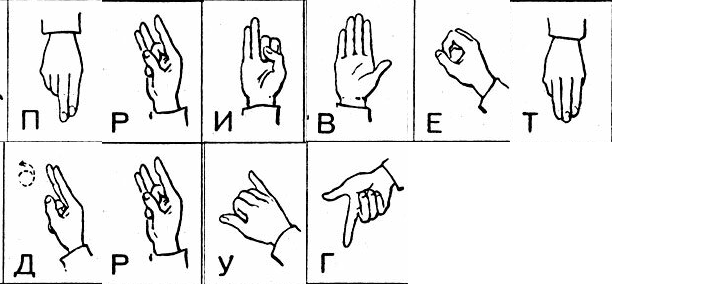

In [4]:
# Пример использования класса
alphabet_image_path = 'Alphabet gestures v2.jpg'  # Путь к изображению алфавита

converter = ImageConverter.from_file(alphabet_image_path, rows=4, cols=8)

text = "Привет друг"
result_image = converter.text_to_image(text, chars_per_line=7)


result_image

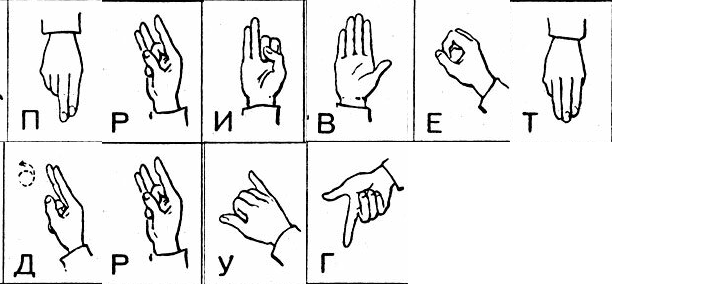

In [5]:
# Пример использования класса
alphabet_image_path = 'Alphabet gestures v2.jpg'  # Путь к изображению алфавита

converter = ImageConverter.from_file(alphabet_image_path, rows=4, cols=8)

text = "Привет друг"
result_image = converter.text_to_image(text, chars_per_line=7)


result_image